/tmp/ipykernel_5613/2311413851.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['PersonBirthDate', 'CINreferralDate', 'CINclosureDate']] = df[['PersonBirthDate', 'CINreferralDate', 'CINclosureDate']].apply(
/tmp/ipykernel_5613/2311413851.py:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


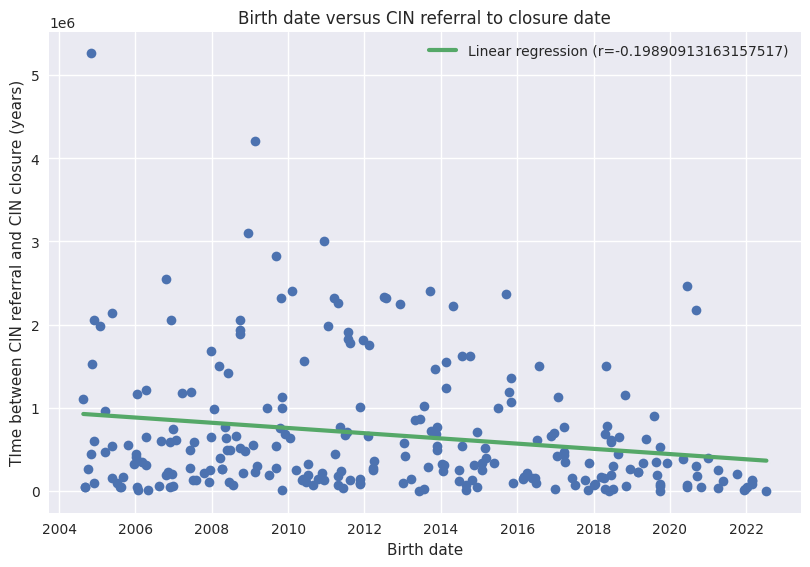

In [31]:
'''Day to day workshop explaining how to merge tables, plot a
scatter, add a line of fit, and do a linear regression.'''

import pandas as pd
import datetime
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import matplotlib.dates as mdates

ChildIdentifiers = pd.read_csv('/workspaces/LA-Analyst-Tinkering/FAKE-CIN-DATA/FakeChildIdentifiers.csv')
CINdetails = pd.read_csv('/workspaces/LA-Analyst-Tinkering/FAKE-CIN-DATA/FakeCINdetails.csv')

#print(CINdetails)
#print(ChildIdentifiers)

merged_df = CINdetails.merge(ChildIdentifiers, left_on='LAchildID', right_on='LAchildID', how='left')
#print(merged_df)

df = merged_df[['LAchildID', 'PersonBirthDate', 'CINreferralDate', 'CINclosureDate']]
df[['PersonBirthDate', 'CINreferralDate', 'CINclosureDate']] = df[['PersonBirthDate', 'CINreferralDate', 'CINclosureDate']].apply(
    pd.to_datetime, format='%Y/%m/%d', errors='coerce'
)
df = df[df['CINclosureDate'].notna()]
df['CINrefToClose'] = df['CINclosureDate'] - df['CINreferralDate']
#print(df)


y = mdates.date2num(df['CINrefToClose'])
x = mdates.date2num(df['PersonBirthDate'])

plt.style.use('seaborn')
plt.plot(df['PersonBirthDate'], y, 'o')


slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
yf = (slope*xf)+intercept

plt.plot(xf1, yf, lw=3, label=f'Linear regression (r={r_value})')

#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m * x + b, label='Linear Regression \n ')

plt.tight_layout()
plt.title('Birth date versus CIN referral to closure date')
plt.xlabel('Birth date')
plt.ylabel('TIme between CIN referral and CIN closure (years)')
plt.legend()
plt.show()

